# 1D FEM: Symbolic Computation of Elementary Stiffness and Mass Matrix
In this notebook we illustrate the calculation of the elementary matrix contributions using symbolic integration of the shape functions $\phi_i(x)$ over the reference element $[0, 1]$ and an arbitrary element $[0, h]$.

The elements of the stiffness matrix are given by integration of the shape function derivatives:
$$ A_e^{ij} = \int_e \phi_i^\prime \phi_j^\prime d\Omega $$
Similarly, the elements of the mass matrix are given by integration of the shape functions themselves:
$$ M_e^{ij} = \int_e \phi_i \phi_j d\Omega $$

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))

import matplotlib.pyplot as plt

Succesfully imported numpy -- Version: 1.19.5
Succesfully imported scipy -- Version: 1.6.0
Succesfully imported sympy -- Version: 1.7.1


## Section 1/2: Linear Shape Function
In the linear case, we have shape functions (two per element) of the form
$$ \phi_i(x) = a_i x + b_i $$
The shape functions must obey
$$ \phi_i(x_j) = \left\{ \begin{array}{ll}
    1 & i = j \\
    0 & i \ne j
\end{array} \right. $$
This can also be generalized to higher-order shape functions.

### Assume element length 1 and thus no scaling with mesh width
Taking the element $[0, 1]$, that is, nodes $x_1 = 0$ and $x_2 = 1$, we find that the shape functions must be
$$ \left\{ \begin{array}{l}
    \phi_1(x) = 1 - x \\
    \phi_2(x) = x
\end{array} \right. $$

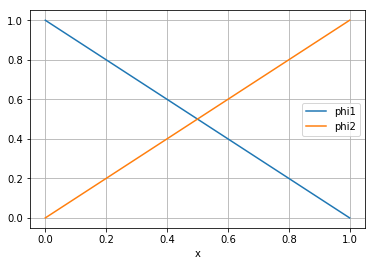

In [2]:
sym.var('x')
phi1 = 1-x
phi2 = x

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

In [3]:
phi = sym.Matrix([phi1, phi2]);
dphi = sym.diff(phi, x);

print("Shape functions"), sym.pprint(phi)
print("Shape function derivatives"), sym.pprint(dphi)

Shape functions
⎡1 - x⎤
⎢     ⎥
⎣  x  ⎦
Shape function derivatives
⎡-1⎤
⎢  ⎥
⎣1 ⎦


(None, None)

In [4]:
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡1   -1⎤
⎢      ⎥
⎣-1  1 ⎦
contribution to the mass matrix
⎡1/3  1/6⎤
⎢        ⎥
⎣1/6  1/3⎦


(None, None)

### Assume element length h and thus scaling with h 
If we take instead a generalized element $[x_l, x_l + h]$, the shape functions must be transformed. As a result, the contributions to the stiffness and mass matrices are scaled by a factor $h$

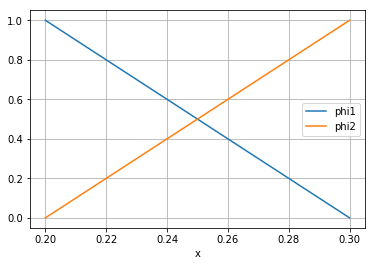

In [5]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (h - x + xl) / h
phi2 = (x - xl) / h

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify([x, xl, h], phi1)
phi2_lambda = sym.lambdify([x, xl, h], phi2)

# Plot the shape functions for this physical element [xl, xl+h]
xl_ = 0.2;
h_  = 0.1;

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(xl_, xl_ + h_, nsamples)
phi1_vec = phi1_lambda(xvec, xl_, h_)
phi2_vec = phi2_lambda(xvec, xl_, h_)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

In [6]:
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)

print("Shape functions"), sym.pprint(phi)
print("Shape function derivatives"), sym.pprint(dphi)

Shape functions
⎡h - x + xl⎤
⎢──────────⎥
⎢    h     ⎥
⎢          ⎥
⎢  x - xl  ⎥
⎢  ──────  ⎥
⎣    h     ⎦
Shape function derivatives
⎡-1 ⎤
⎢───⎥
⎢ h ⎥
⎢   ⎥
⎢ 1 ⎥
⎢ ─ ⎥
⎣ h ⎦


(None, None)

In [7]:
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

contribution to the stiffness matrix
⎡ 1   -1 ⎤
⎢ ─   ───⎥
⎢ h    h ⎥
⎢        ⎥
⎢-1    1 ⎥
⎢───   ─ ⎥
⎣ h    h ⎦
contribution to the mass matrix
⎡h  h⎤
⎢─  ─⎥
⎢3  6⎥
⎢    ⎥
⎢h  h⎥
⎢─  ─⎥
⎣6  3⎦


(None, None)

## Section 2.2: Quadratic Shape Functions
In the linear case, we have shape functions (two per element) of the form
$$ \phi_i(x) = a_i x^2 + b_i x^2 + c_i $$
where the shape functions must obey the same relation as before in the degrees of freedom.

### Assume element length 1 and thus no scaling with mesh width

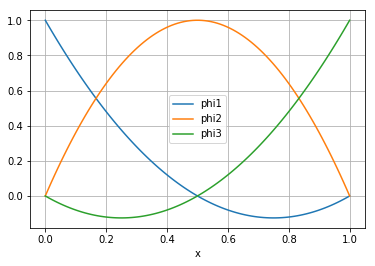

In [8]:
sym.var('x')
phi1 = 2*(1-x)*(0.5-x)
phi2 = 4*x*(1-x)
phi3 = 2*x*(x-0.5)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)
phi3_lambda = sym.lambdify(x, phi3)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

In [9]:
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)

print("Shape functions"), sym.pprint(phi)
print("Shape function derivatives"), sym.pprint(dphi)

Shape functions
⎡(0.5 - x)⋅(2 - 2⋅x)⎤
⎢                   ⎥
⎢    4⋅x⋅(1 - x)    ⎥
⎢                   ⎥
⎣   2⋅x⋅(x - 0.5)   ⎦
Shape function derivatives
⎡4⋅x - 3.0⎤
⎢         ⎥
⎢ 4 - 8⋅x ⎥
⎢         ⎥
⎣4⋅x - 1.0⎦


(None, None)

In [10]:
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡2.33333333333333   -2.66666666666667  0.333333333333332⎤
⎢                                                       ⎥
⎢-2.66666666666667        16/3         -2.66666666666667⎥
⎢                                                       ⎥
⎣0.333333333333332  -2.66666666666667  2.33333333333333 ⎦
contribution to the mass matrix
⎡ 0.133333333333333   0.0666666666666673  -0.0333333333333332⎤
⎢                                                            ⎥
⎢0.0666666666666673          8/15         0.0666666666666667 ⎥
⎢                                                            ⎥
⎣-0.0333333333333332  0.0666666666666667   0.133333333333333 ⎦


(None, None)

### Assume element length h and thus scaling with h

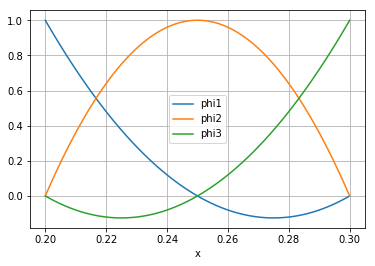

In [11]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (x-xl-h)*(x-xl-h/2)/(h*h/2)
phi2 = (xl-x)*(x-xl-h)/(h*h/4)
phi3 = (x-xl)*(x-xl-h/2)/(h*h/2)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify([x, xl, h], phi1)
phi2_lambda = sym.lambdify([x, xl, h], phi2)
phi3_lambda = sym.lambdify([x, xl, h], phi3)

# Plot the shape functions for this physical element [xl, xl+h]
xl_ = 0.2
h_  = 0.1

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(xl_ , xl_ + h_, nsamples)
phi1_vec = phi1_lambda(xvec, xl_, h_)
phi2_vec = phi2_lambda(xvec, xl_, h_)
phi3_vec = phi3_lambda(xvec, xl_, h_)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

contribution to the stiffness matrix
⎡ 7   -8    1 ⎤
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢-8    16  -8 ⎥
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢ 1   -8    7 ⎥
⎢───  ───  ───⎥
⎣3⋅h  3⋅h  3⋅h⎦
contribution to the mass matrix
⎡2⋅h  h    -h ⎤
⎢───  ──   ───⎥
⎢ 15  15    30⎥
⎢             ⎥
⎢h    8⋅h  h  ⎥
⎢──   ───  ── ⎥
⎢15    15  15 ⎥
⎢             ⎥
⎢-h   h    2⋅h⎥
⎢───  ──   ───⎥
⎣ 30  15    15⎦


(None, None)

# Generate polynomial shape functions
The code below can generate polynomial shape functions of any (reasonable) order, and can be used to verify the results above.

In [13]:
sym.var('x');
sym.var('h');
sym.var('x_l');

n = 2;     # Order of the shape functions
N = n + 1;

a = list(map(lambda i: i/n * h, range(0, N, 1)))
A = list(map(lambda i: [ x**i for x in a], reversed(range(0, N, 1))))
X = list(map(lambda i: x**i, reversed(range(0, N, 1))))

D = sym.Matrix([a for a in A])
X = sym.Matrix([x for x in X])

E = D.inv()

phi = E * X
phi

Matrix([
[1.0 - 3.0*x/h + 2.0*x**2/h**2],
[      4.0*x/h - 4.0*x**2/h**2],
[     -1.0*x/h + 2.0*x**2/h**2]])

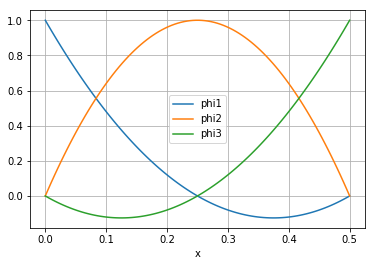

In [14]:
h_num = 0.5;
phi_lambda = sym.lambdify(x, phi.subs(h, h_num))

nsamples = 100 
xvec = np.linspace(0,h_num,nsamples)
phi_vec = phi_lambda(xvec)

for i in range(0, N, 1):
    plt.plot(xvec, phi_vec[i][0][:], label='phi' + str(i+1))

plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

In [15]:
dphi = sym.diff(phi, x)

A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,h))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,h))

print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

contribution to the stiffness matrix
⎡ 2.33333333333333   -2.66666666666667   0.333333333333332 ⎤
⎢ ────────────────   ──────────────────  ───────────────── ⎥
⎢        h                   h                   h         ⎥
⎢                                                          ⎥
⎢-2.66666666666667    5.33333333333333   -2.66666666666667 ⎥
⎢──────────────────   ────────────────   ──────────────────⎥
⎢        h                   h                   h         ⎥
⎢                                                          ⎥
⎢0.333333333333332   -2.66666666666667    2.33333333333333 ⎥
⎢─────────────────   ──────────────────   ──────────────── ⎥
⎣        h                   h                   h         ⎦
contribution to the mass matrix
⎡ 0.133333333333333⋅h   0.0666666666666673⋅h  -0.0333333333333332⋅h⎤
⎢                                                                  ⎥
⎢0.0666666666666673⋅h   0.533333333333333⋅h   0.0666666666666667⋅h ⎥
⎢                                                    

(None, None)